# 03. PyTorch IMAGE CLASSIFICATION

[Computer vision](https://en.wikipedia.org/wiki/Computer_vision) is the art of teaching a computer to see.

For example, it could involve building a model to classify whether a photo is of a cat or a dog ([binary classification](https://developers.google.com/machine-learning/glossary#binary-classification)).

Or whether a photo is of a cat, dog or chicken ([multi-class classification](https://developers.google.com/machine-learning/glossary#multi-class-classification)).

Or identifying where a car appears in a video frame ([object detection](https://en.wikipedia.org/wiki/Object_detection)).

Or figuring out where different objects in an image can be separated ([panoptic segmentation](https://arxiv.org/abs/1801.00868)).

![example computer vision problems](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-problems.png)
*Example computer vision problems for binary classification, multiclass classification, object detection and segmentation.*

## What we're going to cover

We're going to apply the PyTorch Workflow we've been learning in the past couple of sections to computer vision.

![a PyTorch workflow with a computer vision focus](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-pytorch-computer-vision-workflow.png)

Specifically, we're going to cover:

| **Topic** | **Contents** |
| ----- | ----- |
| **0. Computer vision libraries in PyTorch** | PyTorch has a bunch of built-in helpful computer vision libraries, let's check them out.  |
| **1. Load data** | To practice computer vision, we'll start with some images of different pieces of clothing from [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). |
| **2. Prepare data** | We've got some images, let's load them in with a [PyTorch `DataLoader`](https://pytorch.org/docs/stable/data.html) so we can use them with our training loop. |
| **3. Model 0: Building a baseline model** | Here we'll create a multi-class classification model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop**. |
| **4. Making predictions and evaluting model 0** | Let's make some predictions with our baseline model and evaluate them. |
| **5. Setup device agnostic code for future models** | It's best practice to write device-agnostic code, so let's set it up. |
| **6. Model 1: Adding non-linearity** | Experimenting is a large part of machine learning, let's try and improve upon our baseline model by adding non-linear layers. |
| **7. Model 2: Convolutional Neural Network (CNN)** | Time to get computer vision specific and introduce the powerful convolutional neural network architecture. |
| **8. Comparing our models** | We've built three different models, let's compare them. |
| **9. Evaluating our best model** | Let's make some predictons on random images and evaluate our best model. |
| **10. Making a confusion matrix** | A confusion matrix is a great way to evaluate a classification model, let's see how we can make one. |
| **11. Saving and loading the best performing model** | Since we might want to use our model for later, let's save it and make sure it loads back in correctly. |

## 0. Computer vision libraries in PyTorch

Before we get started writing code, let's talk about some PyTorch computer vision libraries you should be aware of.

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. |
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. |
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  |
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

> **Note:** The `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.

Now we've covered some of the most important PyTorch computer vision libraries, let's import the relevant dependencies.


In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
!pip install torchmetrics
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 5.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

## 1. Getting a dataset

To begin working on a computer vision problem, let's get a computer vision dataset.

We're going to start with FashionMNIST.

MNIST stands for Modified National Institute of Standards and Technology.

The [original MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) contains thousands of examples of handwritten digits (from 0 to 9) and was used to build computer vision models to identify numbers for postal services.

[FashionMNIST](https://github.com/zalandoresearch/fashion-mnist), made by Zalando Research, is a similar setup.

Except it contains grayscale images of 10 different kinds of clothing.

![example image of FashionMNIST](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-fashion-mnist-slide.png)
*`torchvision.datasets` contains a lot of example datasets you can use to practice writing computer vision code on. FashionMNIST is one of those datasets. And since it has 10 different image classes (different types of clothing), it's a multi-class classification problem.*

Later, we'll be building a computer vision neural network to identify the different styles of clothing in these images.

PyTorch has a bunch of common computer vision datasets stored in `torchvision.datasets`.

Including FashionMNIST in [`torchvision.datasets.FashionMNIST()`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html).

To download it, we provide the following parameters:
* `root: str` - which folder do you want to download the data to?
* `train: Bool` - do you want the training or test split?
* `download: Bool` - should the data be downloaded?
* `transform: torchvision.transforms` - what transformations would you like to do on the data?
* `target_transform` - you can transform the targets (labels) if you like too.

Many other datasets in `torchvision` have these parameter options.

In [2]:
train_data = datasets.FashionMNIST(
    train = True,
    root = 'dataset/',
    download = True,
    transform = ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:02<00:00, 11221569.95it/s]


Extracting dataset/FashionMNIST/raw/train-images-idx3-ubyte.gz to dataset/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 201558.29it/s]


Extracting dataset/FashionMNIST/raw/train-labels-idx1-ubyte.gz to dataset/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3710082.31it/s]


Extracting dataset/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to dataset/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5254873.93it/s]

Extracting dataset/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/FashionMNIST/raw



In [3]:
test_data = datasets.FashionMNIST(
    root="dataset/",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
image.shape

torch.Size([1, 28, 28])

In [6]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [7]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### 1.2 Visualizing our data

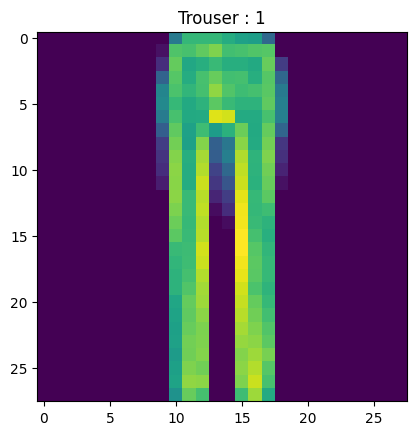

In [8]:
image , target = train_data[69]
plt.imshow(image.squeeze())
plt.title(f'{class_names[target]} : {target}' )
plt.show()

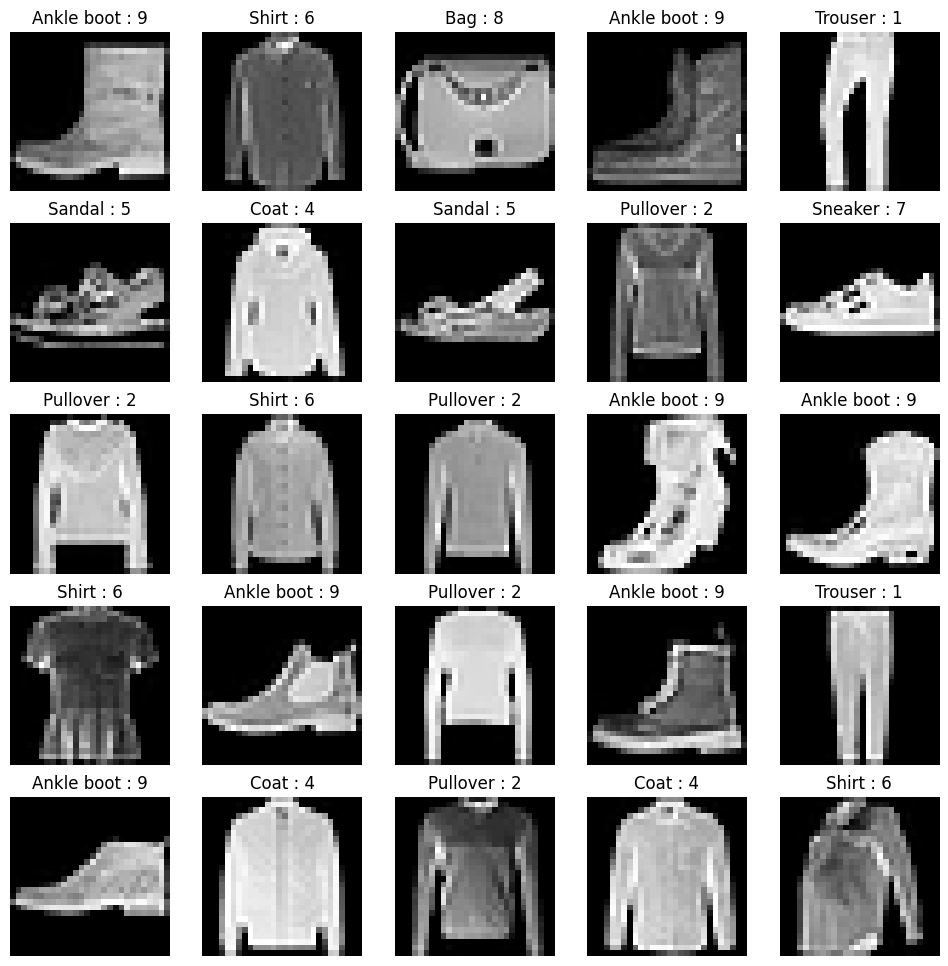

In [9]:
rows, cols = 5,5
def plot_images(rows,cols):
    torch.manual_seed(42)
    fig = plt.figure(figsize=(12, 12))
    for i in range(1,rows*cols+1):
        random_idx = torch.randint(0 , len(train_data), size = [1]).item()
        image, target = train_data[random_idx]
        fig.add_subplot(rows,cols,i)
        plt.title(f'{class_names[target]} : {target}' )
        plt.axis(False);
        plt.imshow(image.squeeze(), cmap='gray')
plot_images(rows=rows,cols = cols)

## 2. Prepare DataLoader

Now we've got a dataset ready to go.

The next step is to prepare it with a [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) or `DataLoader` for short.

The `DataLoader` does what you think it might do.

It helps load data into a model.

For training and for inference.

It turns a large `Dataset` into a Python iterable of smaller chunks.

These smaller chunks are called **batches** or **mini-batches** and can be set by the `batch_size` parameter.

Why do this?

Because it's more computationally efficient.

In an ideal world you could do the forward pass and backward pass across all of your data at once.

But once you start using really large datasets, unless you've got infinite computing power, it's easier to break them up into batches.

It also gives your model more opportunities to improve.

With **mini-batches** (small portions of the data), gradient descent is performed more often per epoch (once per mini-batch rather than once per epoch).

What's a good batch size?

[32 is a good place to start](https://twitter.com/ylecun/status/989610208497360896?s=20&t=N96J_jotN--PYuJk2WcjMw) for a fair amount of problems.

But since this is a value you can set (a **hyperparameter**) you can try all different kinds of values, though generally powers of 2 are used most often (e.g. 32, 64, 128, 256, 512).

![an example of what a batched dataset looks like](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-batching-fashionmnist.png)
*Batching FashionMNIST with a batch size of 32 and shuffle turned on. A similar batching process will occur for other datasets but will differ depending on the batch size.*

Let's create `DataLoader`'s for our training and test sets.

In [10]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dl = DataLoader(
    train_data , shuffle = True , batch_size=BATCH_SIZE
)

test_dl = DataLoader(
    test_data , batch_size = BATCH_SIZE , shuffle = False
)

In [11]:
len(train_dl) , len(test_dl)

(1875, 313)

In [12]:
train_features_batch, train_targets_batch = next(iter(train_dl))
train_features_batch.shape, train_targets_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [13]:
train_features_batch[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0196, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0157, 0.0000, 0.0157, 0.0039, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
          0.0000, 0.1490, 0.4667, 0.5098, 0.5373, 0.4941, 0.4824, 0.5137,
          0.5490, 0.5137, 0.1294, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0118, 0.0039, 0.0157, 0.0000,
          0.2353, 0.5255, 0.1765, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0235, 0.1686, 0.4745, 0.3647, 0.0000, 0.0314,

## 3. Model 2: Building a Convolutional Neural Network (CNN)

Alright, time to step things up a notch.

It's time to create a [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN or ConvNet).

CNN's are known for their capabilities to find patterns in visual data.

And since we're dealing with visual data, let's see if using a CNN model can improve upon our baseline.

The CNN model we're going to be using is known as TinyVGG from the [CNN Explainer](https://poloclub.github.io/cnn-explainer/) website.

It follows the typical structure of a convolutional neural network:

`Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`

Where the contents of `[Convolutional layer -> activation layer -> pooling layer]` can be upscaled and repeated multiple times, depending on requirements.

### What model should I use?

> **Question:** Wait, you say CNN's are good for images, are there any other model types I should be aware of?

Good question.

This table is a good general guide for which model to use (though there are exceptions).

| **Problem type** | **Model to use (generally)** | **Code example** |
| ----- | ----- | ----- |
| Structured data (Excel spreadsheets, row and column data) | Gradient boosted models, Random Forests, XGBoost | [`sklearn.ensemble`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble), [XGBoost library](https://xgboost.readthedocs.io/en/stable/) |
| Unstructured data (images, audio, language) | Convolutional Neural Networks, Transformers | [`torchvision.models`](https://pytorch.org/vision/stable/models.html), [HuggingFace Transformers](https://huggingface.co/docs/transformers/index) |

> **Note:** The table above is only for reference, the model you end up using will be highly dependant on the problem you're working on and the constraints you have (amount of data, latency requirements).

Enough talking about models, let's now build a CNN that replicates the model on the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

![TinyVGG architecture, as setup by CNN explainer website](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-cnn-explainer-model.png)

To do so, we'll leverage the [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) and [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) layers from `torch.nn`.


In [14]:
from torch import nn
class FashionMNISTCNN(nn.Module):
    def __init__(self , input_shape:int , hidden_units : int , output_shape:int):
        super().__init__()
        self.convblock_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units*4,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.convblock_2 = nn.Sequential(
            nn.Conv2d(hidden_units*4, hidden_units*8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units*8, hidden_units*16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.linear_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*7*7,
                      out_features=1024),
            nn.ReLU(),
            nn.Linear(in_features=1024,
                      out_features=512),
            nn.ReLU(),
            nn.Linear(in_features=512,
                      out_features=output_shape)
        )
    def forward(self, x):
        x = self.convblock_1(x)
        x = self.convblock_2(x)
        x = self.linear_stack(x)
        return x

INPUT_SHAPE = 1 # color channel
OUTPUT_SHAPE = len(class_names)
HIDDEN_UNITS = 4

torch.manual_seed(69)
model = FashionMNISTCNN(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,hidden_units=HIDDEN_UNITS)
model.to(device)

FashionMNISTCNN(
  (convblock_1): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(4, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convblock_2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=1024, bias=True)
    (2): ReLU()
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): ReLU()
    (5): Linear(in_features=512, out_features=10, bias=True)
  )
)

### 3.1 Setup loss, optimizer and evaluation metrics


> **Note:** Rather than importing and using our own accuracy function or evaluation metric(s), you could import various evaluation metrics from the [TorchMetrics package](https://torchmetrics.readthedocs.io/en/latest/).

In [15]:
from torchmetrics import Accuracy
accuracy_score = Accuracy(task="multiclass", num_classes=len(class_names)).to(device)

In [16]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

### 4 Functionizing training and test loops

So far we've been writing train and test loops over and over.

Let's write them again but this time we'll put them in functions so they can be called again and again.

And because we're using device-agnostic code now, we'll be sure to call `.to(device)` on our feature (`X`) and target (`y`) tensors.

For the training loop we'll create a function called `train_step()` which takes in a model, a `DataLoader` a loss function and an optimizer.

The testing loop will be similar but it'll be called `test_step()` and it'll take in a model, a `DataLoader`, a loss function and an evaluation function.

> **Note:** Since these are functions, you can customize them in any way you like. What we're making here can be considered barebones training and testing functions for our specific classification use case.

In [17]:
import torch
from torch import nn
def train_step(model : torch.nn.Module,
               train_dl : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer : torch.optim.Optimizer,
               accuracy_fn ,
               device : torch.device = device):


    ### Training
    train_loss, train_accuracy = 0, 0
    model.to(device)
    for batch , (X_train,train_targets) in enumerate(train_dl):
        model.train()
        X_train, train_targets = X_train.to(device), train_targets.to(device)

        train_preds = model(X_train)

        loss = loss_fn(train_preds , train_targets)

        train_loss +=loss
        train_acc = accuracy_fn(train_targets,train_preds.argmax(dim=1))

        train_accuracy+=train_acc

         # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()
        # print(f' Batch : {batch} | train_loss : {loss} | train_accuracy = {train_acc}')

    train_loss /= len(train_dl)
    train_accuracy /= len(train_dl)

    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_accuracy:.5f}%")


def test_step(model : torch.nn.Module,
               test_dl : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               accuracy_fn ,
               device : torch.device = device):

    test_loss, test_accuracy = 0, 0
    model.to(device)
    model.eval()

    with torch.inference_mode():
        for X_test , test_targets in test_dl:
            X_test, test_targets = X_test.to(device), test_targets.to(device)
            test_preds = model(X_test)

            test_loss += loss_fn(test_preds,test_targets)

            test_accuracy += accuracy_fn(test_preds.argmax(dim=1), test_targets)

        test_loss /= len(test_dl)

        # Divide total accuracy by length of test dataloader (per batch)
        test_accuracy /= len(test_dl)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_accuracy:.5f}%\n")


In [18]:
def eval_model(model:torch.nn.Module,
                test_dl : torch.utils.data.DataLoader,
                accuracy_fn):
    ## Testing
    test_loss, test_accuracy = 0, 0
    model.eval()
    with torch.inference_mode():
        for(X_test, test_targets) in test_dl:
            X_test, test_targets = X_test.to(device), test_targets.to(device)
            test_preds = model(X_test)

            test_accuracy += accuracy_fn(test_targets,test_preds.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch

        test_accuracy /= len(test_dl)
    return {"model_name": model, # only works when model was created with a class
            "test_accuracy": test_accuracy.item()}

### 5 Creating a training loop and training a model on batches of data

Beautiful!

Looks like we've got all of the pieces of the puzzle ready to go, a timer, a loss function, an optimizer, a model and most importantly, some data.

Let's now create a training loop and a testing loop to train and evaluate our model.

We'll be using the same steps as the previous notebook(s), though since our data is now in batch form, we'll add another loop to loop through our data batches.

Our data batches are contained within our `DataLoader`s, `train_dataloader` and `test_dataloader` for the training and test data splits respectively.

A batch is `BATCH_SIZE` samples of `X` (features) and `y` (labels), since we're using `BATCH_SIZE=32`, our batches have 32 samples of images and targets.

And since we're computing on batches of data, our loss and evaluation metrics will be calculated **per batch** rather than across the whole dataset.

This means we'll have to divide our loss and accuracy values by the number of batches in each dataset's respective dataloader.

Let's step through it:
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all (for fun).

A fair few steps but...

...if in doubt, code it out.

In [34]:

torch.manual_seed(42)

epochs = 30
from tqdm.auto import tqdm
for epoch in tqdm(range(epochs)):


    print(f"Epoch: {epoch}\n---------")
    train_step(train_dl=train_dl,
        model=model,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_score
    )


    test_step(test_dl=test_dl,
        model=model,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_score
    )


  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.04285 | Train accuracy: 0.98413%
Test loss: 0.43758 | Test accuracy: 0.91534%

Epoch: 1
---------
Train loss: 0.03581 | Train accuracy: 0.98747%
Test loss: 0.41004 | Test accuracy: 0.91573%

Epoch: 2
---------
Train loss: 0.03665 | Train accuracy: 0.98677%
Test loss: 0.44571 | Test accuracy: 0.91623%

Epoch: 3
---------
Train loss: 0.03116 | Train accuracy: 0.98905%
Test loss: 0.44857 | Test accuracy: 0.91873%

Epoch: 4
---------
Train loss: 0.02957 | Train accuracy: 0.98952%
Test loss: 0.43719 | Test accuracy: 0.91244%

Epoch: 5
---------
Train loss: 0.02610 | Train accuracy: 0.99095%
Test loss: 0.43074 | Test accuracy: 0.91633%

Epoch: 6
---------
Train loss: 0.02151 | Train accuracy: 0.99287%
Test loss: 0.52879 | Test accuracy: 0.91703%

Epoch: 7
---------
Train loss: 0.02200 | Train accuracy: 0.99262%
Test loss: 0.50979 | Test accuracy: 0.91304%

Epoch: 8
---------
Train loss: 0.02207 | Train accuracy: 0.99272%
Test loss: 0.52307 | Test accuracy: 0.

In [35]:
eval_model(model=model ,test_dl=test_dl,accuracy_fn=accuracy_score)

{'model_name': FashionMNISTCNN(
   (convblock_1): Sequential(
     (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(4, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (convblock_2): Sequential(
     (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (linear_stack): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=3136, out_features=1024, bias=True)
     (2): ReLU()
     (3): Linear(in_features=1024, out_features=512, bias=True)
     (4): ReLU()
     (5): Linear(in_features=512, out_features=10, bias=True)
   )
 ),
 'test_accuracy': 0.9199280738830566}

## 6. Make and evaluate random predictions with best model

Alright, we've compared our models to each other, let's further evaluate our best performing model, `model_2`.

To do so, let's create a function `make_predictions()` where we can pass the model and some data for it to predict on.

In [36]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

import random
random.seed(69)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=16):
    test_samples.append(sample)
    test_labels.append(label)

pred_probs= make_predictions(model=model,
                             data=test_samples)

pred_classes = pred_probs.argmax(dim=1)
pred_classes

test_labels, pred_classes

([7, 3, 4, 5, 2, 3, 7, 9, 5, 3, 3, 8, 5, 3, 8, 1],
 tensor([7, 3, 4, 5, 2, 3, 7, 9, 5, 3, 3, 8, 5, 3, 8, 1]))

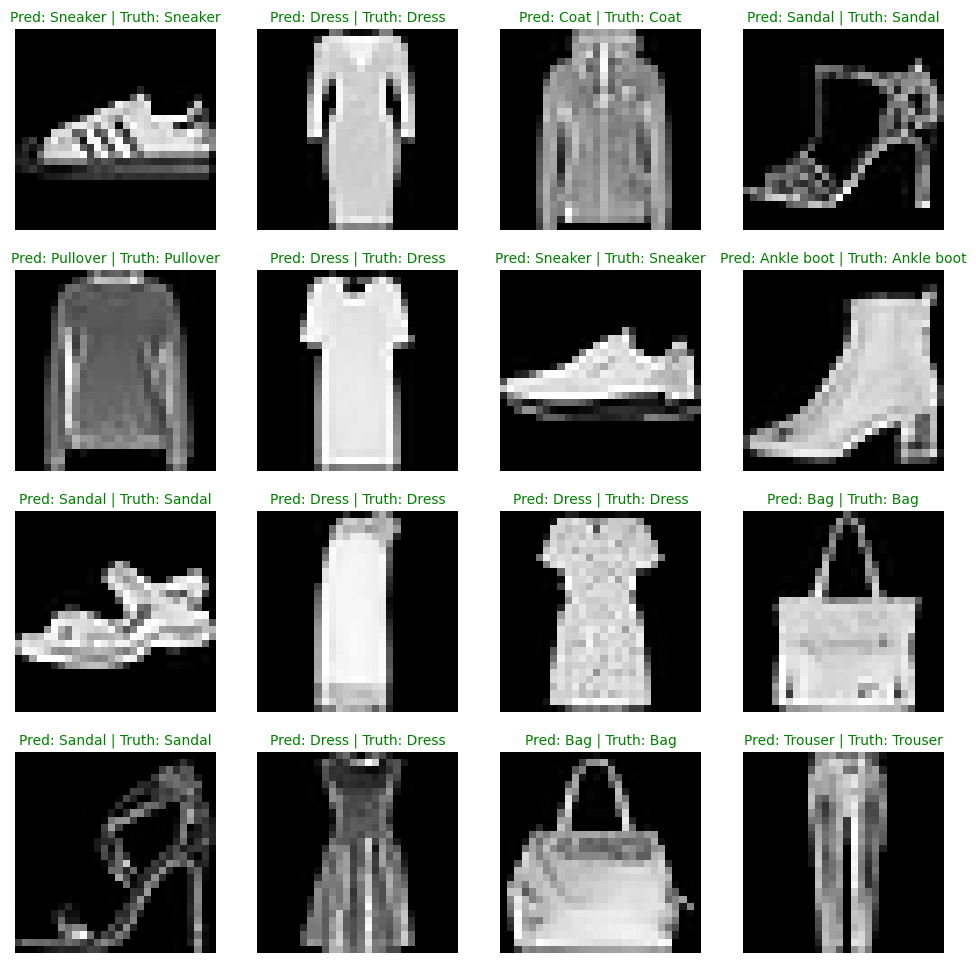

In [37]:
# Plot predictions
plt.figure(figsize=(12, 12))
nrows = 4
ncols = 4
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

## 7. Making a confusion matrix for further prediction evaluation

There are many [different evaluation metrics](https://www.learnpytorch.io/02_pytorch_classification/#9-more-classification-evaluation-metrics) we can use for classification problems.

One of the most visual is a [confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/).

A confusion matrix shows you where your classification model got confused between predicitons and true labels.

To make a confusion matrix, we'll go through three steps:
1. Make predictions with our trained model, `model_2` (a confusion matrix compares predictions to true labels).
2. Make a confusion matrix using [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/latest/references/modules.html?highlight=confusion#confusionmatrix).
3. Plot the confusion matrix using [`mlxtend.plotting.plot_confusion_matrix()`](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/).

Let's start by making predictions with our trained model.

In [38]:
def get_preds(model , dataloader):
    from tqdm.auto import tqdm
    y_preds = []
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(dataloader, desc="Making predictions"):

            X, y = X.to(device), y.to(device)

            y_logit = model(X)

            y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)

            y_preds.append(y_pred.cpu())

    y_pred_tensor = torch.cat(y_preds)
    return y_pred_tensor
test_preds = get_preds(model , test_dl)
test_preds

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 5])

In [39]:
train_preds = get_preds(model , train_dl)
train_preds

Making predictions:   0%|          | 0/1875 [00:00<?, ?it/s]

tensor([8, 0, 4,  ..., 2, 3, 9])

In [40]:
from torchmetrics import ConfusionMatrix
cf = ConfusionMatrix(num_classes=len(class_names), task='multiclass')

cf_array = cf(preds = test_preds,target = test_data.targets).detach().numpy()
cf_array

array([[843,   3,  18,  12,   5,   1, 114,   0,   4,   0],
       [  1, 988,   1,   5,   2,   0,   1,   0,   2,   0],
       [ 14,   0, 886,   9,  48,   0,  42,   0,   1,   0],
       [ 12,   4,   7, 924,  18,   0,  34,   0,   1,   0],
       [  2,   0,  62,  16, 871,   0,  46,   0,   3,   0],
       [  0,   0,   0,   0,   0, 986,   0,  11,   0,   3],
       [ 83,   0,  55,  19,  59,   0, 780,   0,   4,   0],
       [  0,   0,   0,   0,   0,   3,   0, 976,   1,  20],
       [  3,   0,   1,   5,   3,   1,   2,   2, 983,   0],
       [  0,   0,   0,   0,   0,   5,   1,  32,   0, 962]])

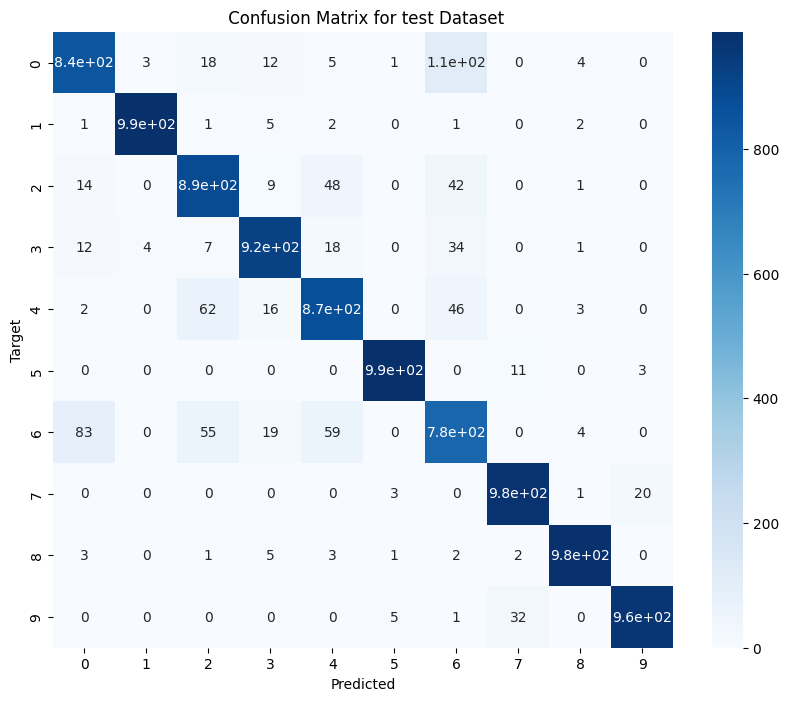

In [41]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(cf_array , annot=True  , cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title(f' Confusion Matrix for test Dataset' )
plt.show()

In [42]:
print(f'Test accuracy : {accuracy_score(test_preds,test_data.targets )*100}%')

Test accuracy : 91.98999786376953%


In [43]:
from sklearn.metrics import classification_report

report = classification_report(test_preds,test_data.targets , target_names = class_names)
report

'              precision    recall  f1-score   support\n\n T-shirt/top       0.84      0.88      0.86       958\n     Trouser       0.99      0.99      0.99       995\n    Pullover       0.89      0.86      0.87      1030\n       Dress       0.92      0.93      0.93       990\n        Coat       0.87      0.87      0.87      1006\n      Sandal       0.99      0.99      0.99       996\n       Shirt       0.78      0.76      0.77      1020\n     Sneaker       0.98      0.96      0.97      1021\n         Bag       0.98      0.98      0.98       999\n  Ankle boot       0.96      0.98      0.97       985\n\n    accuracy                           0.92     10000\n   macro avg       0.92      0.92      0.92     10000\nweighted avg       0.92      0.92      0.92     10000\n'